<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Numerical derivatives based on the Fourier Transform</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Fabian Linder ([@fablindner](https://github.com/fablindner))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
* David Vargas ([@dvargas](https://github.com/davofis))
---

## Basic Equations
The derivative of function $f(x)$ with respect to the spatial coordinate $x$ is calculated using the differentiation theorem of the Fourier transform:

\begin{equation}
\frac{d}{dx} f(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} ik F(k) e^{ikx} dk
\end{equation}

In general, this formulation can be extended to compute the n−th derivative of $f(x)$ by considering that $F^{(n)}(k) = D(k)^{n}F(k) = (ik)^{n}F(k)$. Next, the inverse Fourier transform is taken to return to physical space. 

\begin{equation}
f^{(n)}(x) = \mathscr{F}^{-1}[(ik)^{n}F(k)] = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} (ik)^{n} F(k) e^{ikx} dk
\end{equation}


In [1]:
# Import all necessary libraries, this is a configuration step for the exercise.
# Please run it before the simulation code!
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt


#### Exercise 1

Define a python function call "fourier_derivative(f, dx)" that compute the first derivative of a function $f$ using the Fourier transform properties. 

In [2]:
def fourier_derivative(f, dx):
    # Length of vector f
    nx = np.size(f)
    # Initialize k vector up to Nyquist wavenumber      
    kmax = np.pi/dx
    dk = kmax/(nx/2)
    k = np.arange(float(nx))
    k[: int(nx/2)] = k[: int(nx/2)] * dk 
    k[int(nx/2) :] = k[: int(nx/2)] - kmax
    # Fourier derivative
    ff = np.fft.fft(f); ff = 1j*k*ff
    df_num = np.real(np.fft.ifft(ff))
    return df_num

#### Exercise 2

Calculate the numerical derivative based on the Fourier transform to show that the derivative is exact. Define an arbitrary function (e.g. a Gaussian) and initialize its analytical derivative on the same spatial grid. Calculate the numerical derivative and the difference to the analytical solution. Vary the wavenumber content of the analytical function. Does it make a difference? Why is the numerical result not entirely exact?

In [3]:
# Basic parameters
# ---------------------------------------------------------------
nx = 128
x, dx = np.linspace(2*np.pi/nx, 2*np.pi, nx, retstep=True) 
sigma = 0.5
xo = np.pi

# Initialize Gauss function 
f = np.exp(-1/sigma**2 * (x - xo)**2)

# Numerical derivative  
df_num = fourier_derivative(f, dx)

# Analytical derivative
df_ana = -2*(x-xo)/sigma**2 * np.exp(-1/sigma**2 * (x-xo)**2)

# To make the error visible, it is multiply by 10^13
df_err = 1e13*(df_ana - df_num)

# Error between analytical and numerical solution
err = np.sum((df_num - df_ana)**2) / np.sum(df_ana**2) * 100
print('Error: %s' %err)


Error: 1.34991050164e-26


#### Exercise 3

Now that the numerical derivative is available, we can visually inspect our results. Make a plot of both, the analytical and numerical derivatives together with the difference error.   

<IPython.core.display.Javascript object>


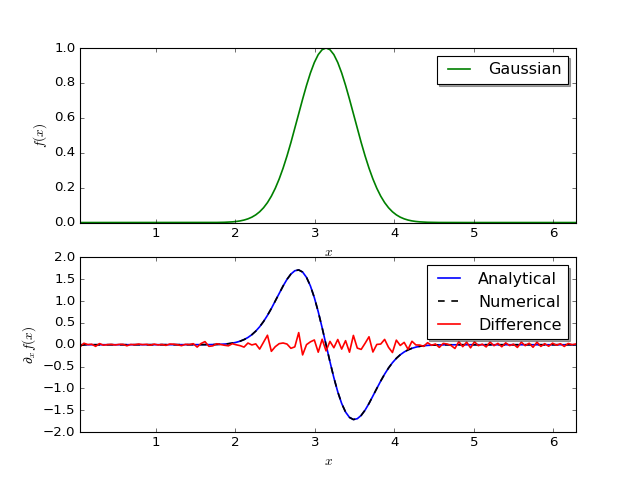

In [4]:
# Plot analytical and numerical derivatives
# ---------------------------------------------------------------

plt.subplot(2,1,1)
plt.plot(x, f, "g", lw = 1.5, label='Gaussian')
plt.legend(loc='upper right', shadow=True)
plt.xlabel('$x$')        
plt.ylabel('$f(x)$')
plt.axis([2*np.pi/nx, 2*np.pi, 0, 1])

plt.subplot(2,1,2)
plt.plot(x, df_ana, "b", lw = 1.5, label='Analytical')
plt.plot(x, df_num, 'k--', lw = 1.5, label='Numerical')
plt.plot(x, df_err, "r", lw = 1.5, label='Difference')
plt.legend(loc='upper right', shadow=True)
plt.xlabel('$x$')        
plt.ylabel('$\partial_x f(x)$')
plt.axis([2*np.pi/nx, 2*np.pi, -2, 2])

plt.show()
#plt.savefig('Fig_5.9.png')